In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Деревья решений

In [3]:
df = pd.read_csv("../input/zomato-restaurants-data/zomato.csv", encoding = "ISO-8859-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


1. Целевая переменная - 'Aggregate rating'. Цель: спрогнозировать рейтинг ресторанов на основе имеющихся признаков.

In [4]:
df_num = df.drop(["Cuisines", "Restaurant Name", "Address", "Locality", "Locality Verbose", "Rating color", "City", "Currency",  "Restaurant ID"], axis = 1)#"Latitude", "Longitude",
df_num["Has Table booking"] = df_num["Has Table booking"].map({"Yes":1,"No":0})
df_num["Has Online delivery"] = df_num["Has Online delivery"].map({"Yes":1,"No":0})
df_num["Is delivering now"] = df_num["Is delivering now"].map({"Yes":1,"No":0})
df_num["Switch to order menu"] = df_num["Switch to order menu"].map({"Yes":1,"No":0})
df_num["Rating text"] = df_num["Rating text"].map({"Excellent":5, "Very Good":4 ,"Good":3, "Average":2, "Poor":1, "Not rated":0})

In [5]:
df_num.head()

,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,162,121.027535,14.565443,1100,1,0,0,0,3,4.8,5,314
1,162,121.014101,14.553708,1200,1,0,0,0,3,4.5,5,591
2,162,121.056831,14.581404,4000,1,0,0,0,4,4.4,4,270
3,162,121.056475,14.585318,1500,0,0,0,0,4,4.9,5,365
4,162,121.057508,14.584450,1500,1,0,0,0,4,4.8,5,229


2. Разбить набор на обучающую и валидационную выборки

In [6]:
# Импорт нужной функции
from sklearn.model_selection import train_test_split

# Создание X, y
# X --- вся таблица без таргета
# y --- таргет (целевая переменная)
y = df_num['Aggregate rating'] 
X = df_num.drop('Aggregate rating', axis=1) 

from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# Разделение
# test_size --- доля исходных данных, которую оставляем для валидации
# random_state --- произвольное целое число, для воспроизводимости случайных результатов

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

3. Обучаем алгоритм регрессии

In [7]:
from sklearn.tree import DecisionTreeRegressor #Обучение
tree = DecisionTreeRegressor(max_depth=3, random_state=2019)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=2019)

In [8]:
from sklearn.metrics import mean_squared_error
y_pred = tree.predict(X_valid)#Предсказание
mean_squared_error(y_valid, y_pred)#качество модели(регрессия)

0.03777257413541502

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=X.columns)
print(open('tree.dot').read()) 

digraph Tree {
node [shape=box] ;
0 [label="Votes <= 3.5\nmse = 2.317\nsamples = 6399\nvalue = 2.654"] ;
1 [label="mse = 0.0\nsamples = 1458\nvalue = 0.0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Rating text <= 2.5\nmse = 0.308\nsamples = 4941\nvalue = 3.438"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="Rating text <= 1.5\nmse = 0.086\nsamples = 2616\nvalue = 3.009"] ;
2 -> 3 ;
4 [label="mse = 0.014\nsamples = 124\nvalue = 2.298"] ;
3 -> 4 ;
5 [label="mse = 0.064\nsamples = 2492\nvalue = 3.045"] ;
3 -> 5 ;
6 [label="Rating text <= 3.5\nmse = 0.12\nsamples = 2325\nvalue = 3.919"] ;
2 -> 6 ;
7 [label="mse = 0.019\nsamples = 1396\nvalue = 3.683"] ;
6 -> 7 ;
8 [label="mse = 0.061\nsamples = 929\nvalue = 4.274"] ;
6 -> 8 ;
}


# Настройка гиперпараметров дерева

1. Создать генератор разбиений, который перемешивает выборку перед созданием блоков

In [10]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42) 

2. Осуществите кросс-валидацию модели для подбора гиперпараметров. Используйте GridSearchCV. Интервалы изменения гиперпараметров задайте самостоятельно.

In [11]:

# Кросс-валидация и подбор гиперпараметров
from sklearn.model_selection import GridSearchCV

tree_params_max_depth = {'max_depth': np.arange(2, 20)}
tree_grid_max_depth = GridSearchCV(tree, tree_params_max_depth, cv=kf, scoring='explained_variance')
tree_grid_max_depth.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=3, random_state=2019),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='explained_variance')

In [12]:
max_depth1 = tree_grid_max_depth.best_params_['max_depth']
max_depth1 # максимальная глубина дерева

6

In [13]:
tree_grid_max_depth.best_score_

0.9870038007658583

In [14]:
tree = DecisionTreeRegressor(max_depth=max_depth1)
tree_params_split = {'min_samples_split': np.arange(2, 20)}
tree_samples_split = GridSearchCV(tree, tree_params_split, cv=kf, scoring='explained_variance')
tree_samples_split.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=6),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='explained_variance')

In [15]:
min_samples_split1 = tree_samples_split.best_params_['min_samples_split']
min_samples_split1 #минимальное число обьектов для разбиения во внутренней вершине

3

In [16]:
tree_samples_split.best_score_

0.9870317813363199

In [17]:
tree = DecisionTreeRegressor(max_depth=max_depth1, min_samples_split=min_samples_split1)
tree_params_leaf = {'min_samples_leaf': np.arange(2, 100)}
tree_samples_leaf = GridSearchCV(tree, tree_params_leaf, cv=kf, scoring='explained_variance') 
tree_samples_leaf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=6, min_samples_split=3),
             param_grid={'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='explained_variance')

In [18]:
min_samples_leaf1 = tree_samples_leaf.best_params_['min_samples_leaf']
min_samples_leaf1 # минимальное число объектов в листе

36

In [19]:
tree_samples_leaf.best_score_

0.9870857715921758

In [20]:
tree = DecisionTreeRegressor(max_depth=max_depth1, min_samples_split=min_samples_split1, min_samples_leaf=min_samples_leaf1)
tree_params_features = {'max_features': np.arange(3, 12)}
tree_max_features = GridSearchCV(tree, tree_params_features, cv=kf, scoring='explained_variance') 
tree_max_features.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=6, min_samples_leaf=36,
                                             min_samples_split=3),
             param_grid={'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])},
             scoring='explained_variance')

In [21]:
tree_max_features1 = tree_max_features.best_params_['max_features']
tree_max_features1

11

In [22]:
tree_max_features.best_score_

0.9870857715921758

4. Построить валидационные кривые

Text(0.5, 0, 'max_features')

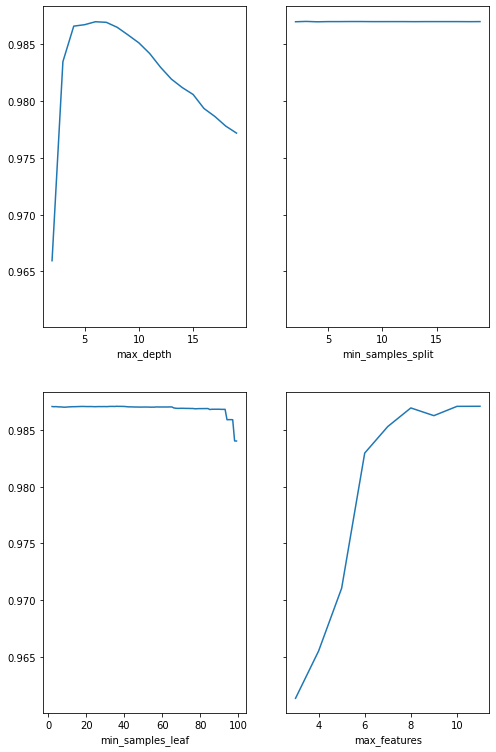

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(8,13))

ax[0, 0].plot(tree_params_max_depth['max_depth'], tree_grid_max_depth.cv_results_['mean_test_score'])
ax[0, 0].set_xlabel('max_depth')

ax[0, 1].plot(tree_params_split['min_samples_split'], tree_samples_split.cv_results_['mean_test_score'])
ax[0, 1].set_xlabel('min_samples_split')

ax[1, 0].plot(tree_params_leaf['min_samples_leaf'], tree_samples_leaf.cv_results_['mean_test_score'])
ax[1, 0].set_xlabel('min_samples_leaf')

ax[1, 1].plot(tree_params_features['max_features'], tree_max_features.cv_results_['mean_test_score'])
ax[1, 1].set_xlabel('max_features')

В результате мы получили набор гиперпараметров: max_depth=6, max_features=11, min_samples_leaf=36, min_samples_split=3.

4. Построить графически полученное дерево

In [24]:
best_tree = DecisionTreeRegressor(max_depth = 6, 
                                   max_features = 11, 
                                   min_samples_leaf = 36, 
                                   min_samples_split = 3)
best_tree.fit(X_train, y_train)
print(mean_squared_error(y_valid, y_pred))
print(best_forest.score(X_valid, y_valid))

0.03777257413541502


NameError: name 'best_forest' is not defined

In [ ]:
export_graphviz(best_tree, out_file='best_tree.dot', feature_names=X.columns)
print(open('best_tree.dot').read()) 

[https://dreampuf.github.io/GraphvizOnline/#digraph%20Tree%20%7B%0D%0Anode%20%5Bshape%3Dbox%5D%20%3B%0D%0A0%20%5Blabel%3D%22Rating%20text%20%3C%3D%200.5%5Cnmse%20%3D%202.317%5Cnsamples%20%3D%206399%5Cnvalue%20%3D%202.654%22%5D%20%3B%0D%0A1%20%5Blabel%3D%22mse%20%3D%200.0%5Cnsamples%20%3D%201458%5Cnvalue%20%3D%200.0%22%5D%20%3B%0D%0A0%20-%3E%201%20%5Blabeldistance%3D2.5%2C%20labelangle%3D45%2C%20headlabel%3D%22True%22%5D%20%3B%0D%0A2%20%5Blabel%3D%22Rating%20text%20%3C%3D%202.5%5Cnmse%20%3D%200.308%5Cnsamples%20%3D%204941%5Cnvalue%20%3D%203.438%22%5D%20%3B%0D%0A0%20-%3E%202%20%5Blabeldistance%3D2.5%2C%20labelangle%3D-45%2C%20headlabel%3D%22False%22%5D%20%3B%0D%0A3%20%5Blabel%3D%22Rating%20text%20%3C%3D%201.5%5Cnmse%20%3D%200.086%5Cnsamples%20%3D%202616%5Cnvalue%20%3D%203.009%22%5D%20%3B%0D%0A2%20-%3E%203%20%3B%0D%0A4%20%5Blabel%3D%22Votes%20%3C%3D%2055.5%5Cnmse%20%3D%200.014%5Cnsamples%20%3D%20124%5Cnvalue%20%3D%202.298%22%5D%20%3B%0D%0A3%20-%3E%204%20%3B%0D%0A5%20%5Blabel%3D%22mse%20%3D%200.006%5Cnsamples%20%3D%2066%5Cnvalue%20%3D%202.336%22%5D%20%3B%0D%0A4%20-%3E%205%20%3B%0D%0A6%20%5Blabel%3D%22mse%20%3D%200.02%5Cnsamples%20%3D%2058%5Cnvalue%20%3D%202.255%22%5D%20%3B%0D%0A4%20-%3E%206%20%3B%0D%0A7%20%5Blabel%3D%22Votes%20%3C%3D%2011.5%5Cnmse%20%3D%200.064%5Cnsamples%20%3D%202492%5Cnvalue%20%3D%203.045%22%5D%20%3B%0D%0A3%20-%3E%207%20%3B%0D%0A8%20%5Blabel%3D%22Longitude%20%3C%3D%2038.493%5Cnmse%20%3D%200.025%5Cnsamples%20%3D%20797%5Cnvalue%20%3D%202.969%22%5D%20%3B%0D%0A7%20-%3E%208%20%3B%0D%0A9%20%5Blabel%3D%22mse%20%3D%200.013%5Cnsamples%20%3D%2057%5Cnvalue%20%3D%203.075%22%5D%20%3B%0D%0A8%20-%3E%209%20%3B%0D%0A10%20%5Blabel%3D%22Has%20Online%20delivery%20%3C%3D%200.5%5Cnmse%20%3D%200.025%5Cnsamples%20%3D%20740%5Cnvalue%20%3D%202.96%22%5D%20%3B%0D%0A8%20-%3E%2010%20%3B%0D%0A11%20%5Blabel%3D%22mse%20%3D%200.018%5Cnsamples%20%3D%20609%5Cnvalue%20%3D%202.973%22%5D%20%3B%0D%0A10%20-%3E%2011%20%3B%0D%0A12%20%5Blabel%3D%22mse%20%3D%200.051%5Cnsamples%20%3D%20131%5Cnvalue%20%3D%202.899%22%5D%20%3B%0D%0A10%20-%3E%2012%20%3B%0D%0A13%20%5Blabel%3D%22Latitude%20%3C%3D%2028.349%5Cnmse%20%3D%200.078%5Cnsamples%20%3D%201695%5Cnvalue%20%3D%203.081%22%5D%20%3B%0D%0A7%20-%3E%2013%20%3B%0D%0A14%20%5Blabel%3D%22Votes%20%3C%3D%2046.5%5Cnmse%20%3D%200.027%5Cnsamples%20%3D%2083%5Cnvalue%20%3D%203.278%22%5D%20%3B%0D%0A13%20-%3E%2014%20%3B%0D%0A15%20%5Blabel%3D%22mse%20%3D%200.041%5Cnsamples%20%3D%2042%5Cnvalue%20%3D%203.233%22%5D%20%3B%0D%0A14%20-%3E%2015%20%3B%0D%0A16%20%5Blabel%3D%22mse%20%3D%200.007%5Cnsamples%20%3D%2041%5Cnvalue%20%3D%203.324%22%5D%20%3B%0D%0A14%20-%3E%2016%20%3B%0D%0A17%20%5Blabel%3D%22Longitude%20%3C%3D%2077.246%5Cnmse%20%3D%200.078%5Cnsamples%20%3D%201612%5Cnvalue%20%3D%203.071%22%5D%20%3B%0D%0A13%20-%3E%2017%20%3B%0D%0A18%20%5Blabel%3D%22mse%20%3D%200.074%5Cnsamples%20%3D%201081%5Cnvalue%20%3D%203.101%22%5D%20%3B%0D%0A17%20-%3E%2018%20%3B%0D%0A19%20%5Blabel%3D%22mse%20%3D%200.082%5Cnsamples%20%3D%20531%5Cnvalue%20%3D%203.008%22%5D%20%3B%0D%0A17%20-%3E%2019%20%3B%0D%0A20%20%5Blabel%3D%22Rating%20text%20%3C%3D%203.5%5Cnmse%20%3D%200.12%5Cnsamples%20%3D%202325%5Cnvalue%20%3D%203.919%22%5D%20%3B%0D%0A2%20-%3E%2020%20%3B%0D%0A21%20%5Blabel%3D%22Votes%20%3C%3D%2088.5%5Cnmse%20%3D%200.019%5Cnsamples%20%3D%201396%5Cnvalue%20%3D%203.683%22%5D%20%3B%0D%0A20%20-%3E%2021%20%3B%0D%0A22%20%5Blabel%3D%22Votes%20%3C%3D%2039.5%5Cnmse%20%3D%200.016%5Cnsamples%20%3D%20528%5Cnvalue%20%3D%203.633%22%5D%20%3B%0D%0A21%20-%3E%2022%20%3B%0D%0A23%20%5Blabel%3D%22Longitude%20%3C%3D%2077.084%5Cnmse%20%3D%200.015%5Cnsamples%20%3D%20218%5Cnvalue%20%3D%203.606%22%5D%20%3B%0D%0A22%20-%3E%2023%20%3B%0D%0A24%20%5Blabel%3D%22mse%20%3D%200.019%5Cnsamples%20%3D%2052%5Cnvalue%20%3D%203.66%22%5D%20%3B%0D%0A23%20-%3E%2024%20%3B%0D%0A25%20%5Blabel%3D%22mse%20%3D%200.012%5Cnsamples%20%3D%20166%5Cnvalue%20%3D%203.589%22%5D%20%3B%0D%0A23%20-%3E%2025%20%3B%0D%0A26%20%5Blabel%3D%22Latitude%20%3C%3D%2028.559%5Cnmse%20%3D%200.017%5Cnsamples%20%3D%20310%5Cnvalue%20%3D%203.651%22%5D%20%3B%0D%0A22%20-%3E%2026%20%3B%0D%0A27%20%5Blabel%3D%22mse%20%3D%200.018%5Cnsamples%20%3D%20132%5Cnvalue%20%3D%203.673%22%5D%20%3B%0D%0A26%20-%3E%2027%20%3B%0D%0A28%20%5Blabel%3D%22mse%20%3D%200.015%5Cnsamples%20%3D%20178%5Cnvalue%20%3D%203.635%22%5D%20%3B%0D%0A26%20-%3E%2028%20%3B%0D%0A29%20%5Blabel%3D%22Votes%20%3C%3D%20549.5%5Cnmse%20%3D%200.019%5Cnsamples%20%3D%20868%5Cnvalue%20%3D%203.714%22%5D%20%3B%0D%0A21%20-%3E%2029%20%3B%0D%0A30%20%5Blabel%3D%22Average%20Cost%20for%20two%20%3C%3D%20235.0%5Cnmse%20%3D%200.019%5Cnsamples%20%3D%20757%5Cnvalue%20%3D%203.707%22%5D%20%3B%0D%0A29%20-%3E%2030%20%3B%0D%0A31%20%5Blabel%3D%22mse%20%3D%200.015%5Cnsamples%20%3D%20123%5Cnvalue%20%3D%203.75%22%5D%20%3B%0D%0A30%20-%3E%2031%20%3B%0D%0A32%20%5Blabel%3D%22mse%20%3D%200.019%5Cnsamples%20%3D%20634%5Cnvalue%20%3D%203.698%22%5D%20%3B%0D%0A30%20-%3E%2032%20%3B%0D%0A33%20%5Blabel%3D%22Longitude%20%3C%3D%2077.195%5Cnmse%20%3D%200.016%5Cnsamples%20%3D%20111%5Cnvalue%20%3D%203.764%22%5D%20%3B%0D%0A29%20-%3E%2033%20%3B%0D%0A34%20%5Blabel%3D%22mse%20%3D%200.012%5Cnsamples%20%3D%2045%5Cnvalue%20%3D%203.789%22%5D%20%3B%0D%0A33%20-%3E%2034%20%3B%0D%0A35%20%5Blabel%3D%22mse%20%3D%200.017%5Cnsamples%20%3D%2066%5Cnvalue%20%3D%203.747%22%5D%20%3B%0D%0A33%20-%3E%2035%20%3B%0D%0A36%20%5Blabel%3D%22Rating%20text%20%3C%3D%204.5%5Cnmse%20%3D%200.061%5Cnsamples%20%3D%20929%5Cnvalue%20%3D%204.274%22%5D%20%3B%0D%0A20%20-%3E%2036%20%3B%0D%0A37%20%5Blabel%3D%22Votes%20%3C%3D%20600.0%5Cnmse%20%3D%200.019%5Cnsamples%20%3D%20724%5Cnvalue%20%3D%204.165%22%5D%20%3B%0D%0A36%20-%3E%2037%20%3B%0D%0A38%20%5Blabel%3D%22Latitude%20%3C%3D%2026.17%5Cnmse%20%3D%200.018%5Cnsamples%20%3D%20543%5Cnvalue%20%3D%204.152%22%5D%20%3B%0D%0A37%20-%3E%2038%20%3B%0D%0A39%20%5Blabel%3D%22mse%20%3D%200.019%5Cnsamples%20%3D%20188%5Cnvalue%20%3D%204.188%22%5D%20%3B%0D%0A38%20-%3E%2039%20%3B%0D%0A40%20%5Blabel%3D%22mse%20%3D%200.016%5Cnsamples%20%3D%20355%5Cnvalue%20%3D%204.133%22%5D%20%3B%0D%0A38%20-%3E%2040%20%3B%0D%0A41%20%5Blabel%3D%22Longitude%20%3C%3D%2076.799%5Cnmse%20%3D%200.019%5Cnsamples%20%3D%20181%5Cnvalue%20%3D%204.203%22%5D%20%3B%0D%0A37%20-%3E%2041%20%3B%0D%0A42%20%5Blabel%3D%22mse%20%3D%200.016%5Cnsamples%20%3D%2076%5Cnvalue%20%3D%204.253%22%5D%20%3B%0D%0A41%20-%3E%2042%20%3B%0D%0A43%20%5Blabel%3D%22mse%20%3D%200.018%5Cnsamples%20%3D%20105%5Cnvalue%20%3D%204.168%22%5D%20%3B%0D%0A41%20-%3E%2043%20%3B%0D%0A44%20%5Blabel%3D%22Votes%20%3C%3D%201302.0%5Cnmse%20%3D%200.022%5Cnsamples%20%3D%20205%5Cnvalue%20%3D%204.658%22%5D%20%3B%0D%0A36%20-%3E%2044%20%3B%0D%0A45%20%5Blabel%3D%22Price%20range%20%3C%3D%203.5%5Cnmse%20%3D%200.021%5Cnsamples%20%3D%20168%5Cnvalue%20%3D%204.64%22%5D%20%3B%0D%0A44%20-%3E%2045%20%3B%0D%0A46%20%5Blabel%3D%22mse%20%3D%200.019%5Cnsamples%20%3D%20124%5Cnvalue%20%3D%204.619%22%5D%20%3B%0D%0A45%20-%3E%2046%20%3B%0D%0A47%20%5Blabel%3D%22mse%20%3D%200.024%5Cnsamples%20%3D%2044%5Cnvalue%20%3D%204.702%22%5D%20%3B%0D%0A45%20-%3E%2047%20%3B%0D%0A48%20%5Blabel%3D%22mse%20%3D%200.018%5Cnsamples%20%3D%2037%5Cnvalue%20%3D%204.738%22%5D%20%3B%0D%0A44%20-%3E%2048%20%3B%0D%0A%7D%0D%0Aadd%20Codeadd%20Markdown](http://)

Оценка важности признаков

In [ ]:
features = dict(zip(range(len(X.columns)), X.columns))
features

In [ ]:
importances = best_tree.feature_importances_

importances


In [ ]:
indices = np.argsort(importances)[::-1]
indices


In [ ]:

num = len(X.columns)
feature_indices = [i for i in indices[:num]]

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

# Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor
fr = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6)
fr.fit(X_train, y_train)
y_pred = fr.predict(X_valid)

print(mean_squared_error(y_valid, y_pred))
print(fr.score(X_valid, y_valid))

In [ ]:
fr_params_estimators = {'n_estimators': [20, 50, 80, 100]}# количество деревьев 
fr_n_estimators = GridSearchCV(fr, fr_params_estimators, cv=kf, scoring='explained_variance', n_jobs = -1)
fr_n_estimators.fit(X_train, y_train)
n_estimators1 = fr_n_estimators.best_params_['n_estimators']
n_estimators1

In [ ]:
fr = RandomForestRegressor(n_estimators = n_estimators1)#максимальная глубина 
fr_params_depth = {'max_depth': np.arange(1, 20)}
fr_max_depth = GridSearchCV(fr, fr_params_depth, cv=kf, scoring='explained_variance')
fr_max_depth.fit(X_train, y_train)
max_depth1 = fr_max_depth.best_params_['max_depth']
max_depth1

In [ ]:
fr = RandomForestRegressor(n_estimators = n_estimators1, max_depth = max_depth1)#минимальное число объектов для разбиения во внутренней вершине min_samples_split
fr_params_split = {'min_samples_split': np.arange(3, 20)}
fr_samples_split = GridSearchCV(fr, fr_params_split, cv=kf, scoring='explained_variance')
fr_samples_split.fit(X_train, y_train)
min_samples_split1 = fr_samples_split.best_params_['min_samples_split']
min_samples_split1

In [ ]:
fr = RandomForestRegressor(n_estimators = n_estimators1, max_depth = max_depth1)
fr_params_leaf = {'min_samples_leaf': np.arange(1, 20)}#минимальное число объектов в листе min_samples_leaf
fr_samples_leaf = GridSearchCV(fr, fr_params_leaf, cv=kf, scoring='explained_variance')
fr_samples_leaf.fit(X_train, y_train)
min_samples_leaf1 = fr_samples_leaf.best_params_['min_samples_leaf']
min_samples_leaf1

In [ ]:
fr = RandomForestRegressor(n_estimators = n_estimators1, max_depth = max_depth1, min_samples_split = min_samples_split1, min_samples_leaf = min_samples_leaf1)
#максимальное количество признаков, рассматриваемых при поиске лучшего разбиения
fr_params_features = {'max_features': np.arange(1, 12)}
fr_max_features = GridSearchCV(fr, fr_params_features, cv=kf, scoring='explained_variance')
fr_max_features.fit(X_train, y_train)
max_features1 = fr_max_features.best_params_['max_features']
max_features1

In [ ]:
best_forest = RandomForestRegressor(n_estimators = n_estimators1, max_depth = max_depth1, min_samples_split = min_samples_split1, min_samples_leaf = min_samples_leaf1, max_features = max_features1)
best_forest.fit(X_train, y_train)

In [ ]:
y_pred = best_forest.predict(X_valid)

print(mean_squared_error(y_valid, y_pred))
print(best_forest.score(X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(8,13))

ax[0, 0].plot(fr_params_depth['max_depth'], fr_max_depth.cv_results_['mean_test_score'])
ax[0, 0].set_xlabel('max_depth')

ax[0, 1].plot(fr_params_split['min_samples_split'], fr_samples_split.cv_results_['mean_test_score'])
ax[0, 1].set_xlabel('min_samples_split')

ax[1, 0].plot(fr_params_leaf['min_samples_leaf'], fr_samples_leaf.cv_results_['mean_test_score'])
ax[1, 0].set_xlabel('min_samples_leaf')

ax[1, 1].plot(fr_params_features['max_features'], fr_max_features.cv_results_['mean_test_score'])
ax[1, 1].set_xlabel('max_features')

In [ ]:
importances = best_forest.feature_importances_

indices = np.argsort(importances)[::-1]
num = len(X.columns)
feature_indices = [i for i in indices[:num]]

for i in range(num):
    print(i+1, features[feature_indices[i]], importances[indices[i]])

In [ ]:
bars = plt.bar(range(num), importances[indices[:num]])

t = plt.xticks(range(num), feature_indices)

plt.legend(bars, [(features[i]) for i in feature_indices]);

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()# обучаем классификации
knn.fit(X_train,y_train)
y_pred = knn.predict(X_valid) # делаем прогноз
print(mean_squared_error(y_valid, y_pred))
print(best_forest.score(X_valid, y_valid))

Выводы:

* Качество модели метода ближайших соседей по идее худшее из всех. Но у меня показало примерно такой же результат, что и дерево.
* Дерево решений досаточно быстрое, модель оказалась чуть лучше чем kNN.
* Случайный лес показал лучший результат. Минусом является длительность выполнения работы при большом количестве деревьев.